Another attempt at Ensemble regression using a more recent example...

In [9]:
# IMPORTS
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statistics as st
import warnings
import matplotlib.pyplot as plt 

warnings.filterwarnings('ignore')







In [10]:
# SPLITTING THE DATASET
target_path = '/kaggle/input/abalone/train.csv'
submission_path = '/kaggle/input/abalone/test.csv'

target = pd.read_csv(target_path)
submission = pd.read_csv(submission_path)

In [11]:
# One-hot encode 'Sex'
target = pd.get_dummies(target, columns=['Sex'], drop_first=True)
submission = pd.get_dummies(submission, columns=['Sex'], drop_first=True)

In [12]:
# View the updated dataset
target.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Sex_I,Sex_M
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,False,False
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,False,False
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,True,False
3,3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,False,True
4,4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,True,False


### Look at data a little bit

In [13]:
target.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [14]:
target.columns

Index(['id', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

The id warps the scale of this plot, and adds no value...

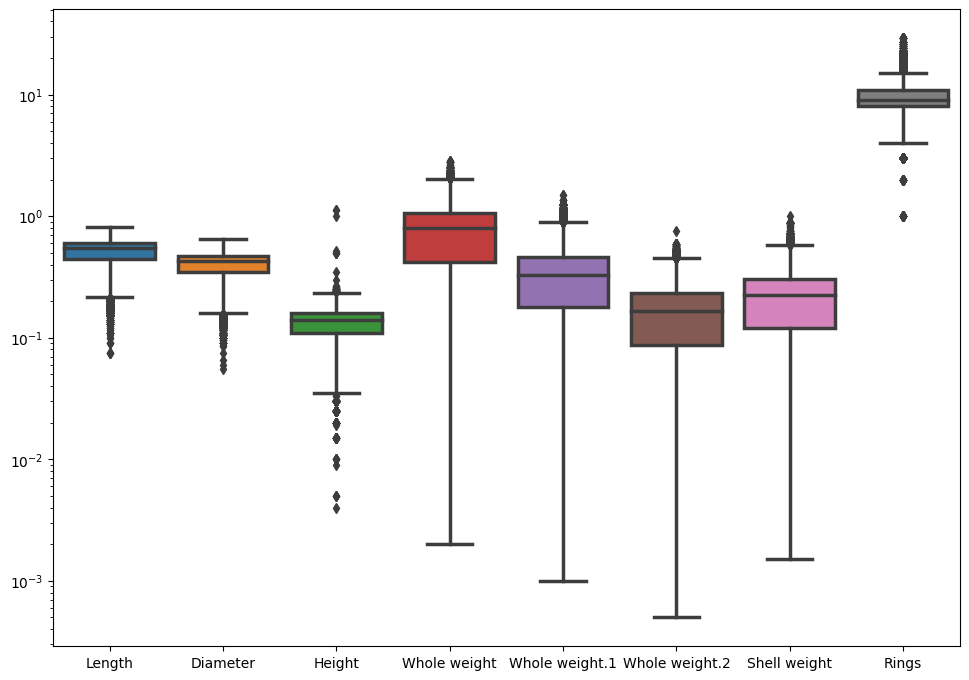

In [16]:
import seaborn as sns

a4_dims = (11.7, 8.27)
# drop is not destructive unless the inplace argument is used
# Note that the axis is required or it thinks you want to drop a row
no_id_target = target.drop(['id', 'Sex_I', 'Sex_M'], axis=1)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.boxplot(data=no_id_target,linewidth=2.5,ax=ax)
g.set_yscale("log")

Doesn't look like binary columns do well in a box plot.  Not sure what is indicated.  I would think that they would be a point...  Removed the two sex columns along with the id.

In [17]:
target['Sex_I']

0        False
1        False
2         True
3        False
4         True
         ...  
90610    False
90611    False
90612     True
90613     True
90614     True
Name: Sex_I, Length: 90615, dtype: bool

In [18]:
x = target.drop('Rings', axis = 1)
y = target['Rings']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
# MODELS CREATION
dtmodel = DecisionTreeRegressor()
knmodel = KNeighborsRegressor()
lrmodel= LinearRegression()

dtmodel.fit(x_train,y_train)
knmodel.fit(x_train,y_train)
lrmodel.fit(x_train,y_train)


LinearRegression()

In [21]:
# PREDICTION
pred1=dtmodel.predict(x_test)
pred2=knmodel.predict(x_test)
pred3=lrmodel.predict(x_test)


In [22]:
len(pred2)

18123

Note that previous versions of this code, which were using Classifiers, used LogisticRegression.  This is a classifier, not a regressor, despite its name.

In [23]:
models = [{"predictions": pred1, "model": dtmodel, "name": "Decision Tree"}, 
          {"predictions": pred2, "model": knmodel, "name": "K Neighbors"},
          {"predictions": pred3, "model": lrmodel, "name": "Linear Regression"},
         ]
models[0]

{'predictions': array([ 5.,  6.,  9., ..., 11.,  6.,  8.]),
 'model': DecisionTreeRegressor(),
 'name': 'Decision Tree'}

In [24]:
pred3[:20]

array([ 7.10820247,  6.93512552,  8.40471328,  9.80915189,  9.09349532,
        8.7135917 , 10.32857452, 11.55892973, 12.56937706,  9.55060408,
        5.91394567,  5.67336775,  6.75981962,  8.71208794,  9.87829297,
        5.73369253, 13.67230021,  6.09967048, 10.71992044, 12.82574066])

In [25]:
def plot_predictions(models, sample_size=10):
    x = [n for n in range(sample_size)]

    plt.figure(figsize=(10, 6))

    # plot line
    for model in models:  
        plt.plot(x, model['predictions'][:sample_size], label=model['name'])

    plt.legend()
    plt.show()

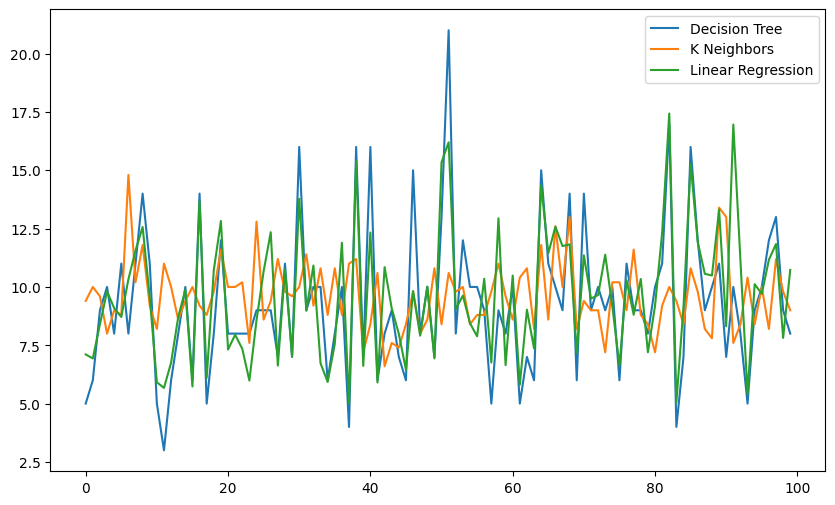

In [26]:
plot_predictions(models, 100)

In [27]:
# FINAL_PREDICTION
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, st.mode([pred1[i], pred2[i], pred3[i]]))
print(final_pred)

[ 5.  6.  9. ... 11.  6.  8.]


In [28]:
len(final_pred)

18123

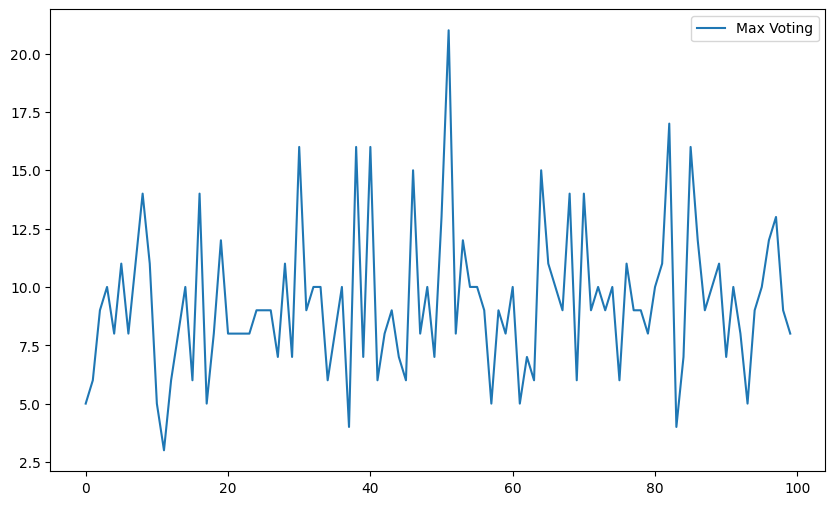

In [29]:
final_model1 = [{"predictions": final_pred, "name": "Max Voting"} ]
plot_predictions(final_model1, 100)

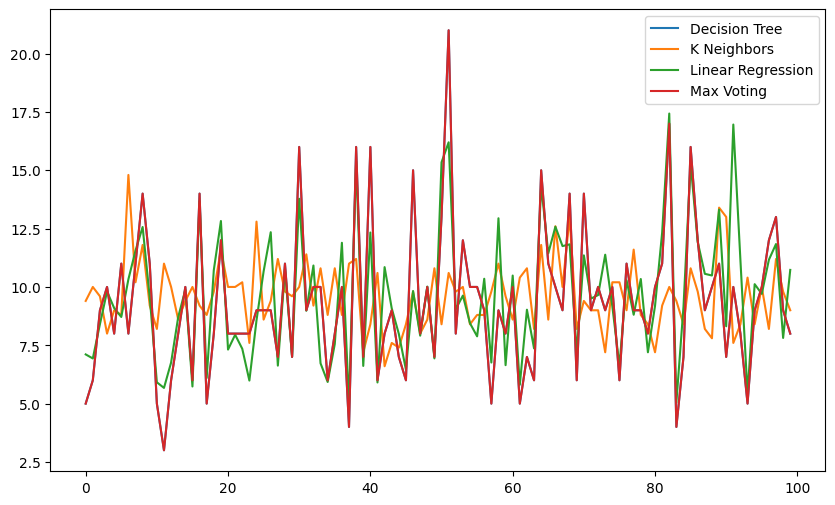

In [30]:
combo1 = models + final_model1
plot_predictions(combo1, 100)

### Seaborn examples to look at distribution of the errors

In [31]:
import seaborn as sns

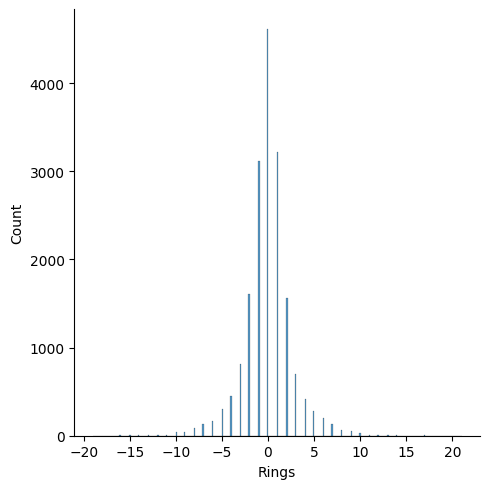

In [32]:
sns.displot(y_test-models[0]['predictions'])

<Axes: xlabel='Rings', ylabel='Count'>

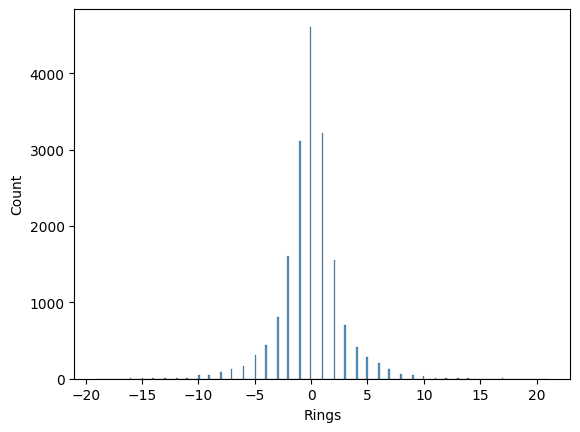

In [33]:
sns.histplot(y_test-models[0]['predictions'])

In this type of plot a perfect diagonal line would indicate that the predictions match the model

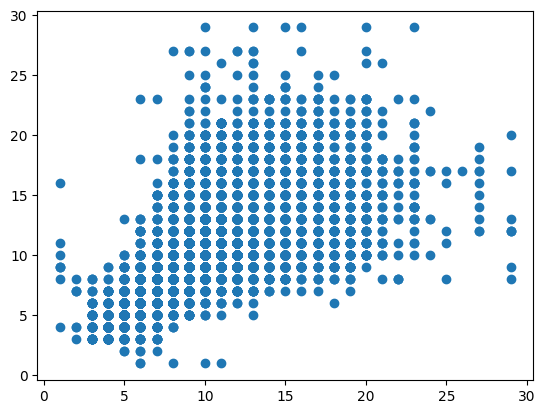

In [34]:
plt.scatter(y_test,models[0]['predictions'])

In [35]:
models[0]['predictions']

array([ 5.,  6.,  9., ..., 11.,  6.,  8.])

### Now to try VotingRegressor
to see if this improves the results over the individual models

In [36]:
from sklearn.ensemble import VotingRegressor


vcmodel = VotingRegressor(estimators=[('dt', models[0]["model"]), 
                                      ('kn', models[1]["model"]), 
                                      ('lr', models[2]["model"])])
vcmodel.fit(x_train,y_train)
vcmodel.score(x_test,y_test)

0.5153524784443088

Now trying averaging:

In [37]:
#total = []
#for model in models:
#    pred = model['model'].predict_proba(x_test)
#    if (len(total) == 0):
#        total = pred
#    else:
#        total += pred


#finalpreda=(total)/3

Note how this does not really work, as the probabilities returned are a distribution, not a single value:
https://towardsdatascience.com/predict-vs-predict-proba-scikit-learn-bdc45daa5972

In [38]:
#final_model1a = [{"predictions": finalpreda, "model": vcmodel, "name": "Averaging"} ]
#plot_predictions(final_model1a, 100)

Introducing the evaluations and code used in my previous submission
https://github.com/flyinacres/kaggle/blob/main/abalone-submission-01.ipynb

In [39]:
from sklearn.metrics import mean_squared_log_error

def root_mean_squared_log_error(y_true, y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [40]:
def identify_negatives(predictions):
    n = [num for num in predictions if num < 0]
    print(n)

In [41]:
def ceil_predictions(predictions):
    return [0.0001 if num < 0 else num for num in predictions]


In [42]:
# Need to ensure that results don't contain negative numbers or 0, or log will not work.
n = [0.0001 if num < 0 else num for num in models[2]['predictions']]
#print(n)

In [43]:
from sklearn.metrics import r2_score

def evaluate_model(true, predicted):
    # mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    # rmse = np.sqrt(mean_squared_error(true, predicted))
    predicted = ceil_predictions(predicted)
    r2_square = r2_score(true, predicted)
    rmsle = root_mean_squared_log_error(true, predicted)
    return r2_square,rmsle 

Pretty poor results as such...  Not worth submitting

In [44]:
for model in models:
    pred = model['model'].predict(x_test)
    print(evaluate_model(y_test, pred))

(0.2972499226495119, 0.2156522015186994)
(-0.16121687329383527, 0.3110966611528479)
(0.6107223774586408, 0.1651925987148862)


Let's see if I can improve either of the first two estimators by using an automated parameter search function

https://scikit-learn.org/1.5/modules/grid_search.html

In [45]:
# Hyper parameters range intialization for tuning a decision tree

param_grid={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

#Caution: The follow cell is sloooooowww....

In [46]:
# Try the Halving Grid to see if I can get some better parameters

# This line must come before the import.
# The noqa tells linters to ignore what appears to be an unused import
from sklearn.experimental import enable_halving_search_cv #noqa
from sklearn.model_selection import HalvingGridSearchCV

halving_grid = HalvingGridSearchCV(models[0]["model"], param_grid, cv=5)
# This code works, but takes 30+ minutes.  So commenting it out for now to support 'run all'
#halving_grid.fit(x_train, y_train)

#print(halving_grid.best_params_)
#print(halving_grid.best_score_)

This took a considerable time to run, so saving value here:
{'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 80, 'min_samples_leaf': 9, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}
0.49305159474378435

Next, try this model with the tuned params to see how well it works.

In [47]:
dtmodel2 = DecisionTreeRegressor(max_depth=5, max_features=None,max_leaf_nodes=80, min_samples_leaf=9, 
                                 min_weight_fraction_leaf=0.1, splitter='best')

In [48]:
dtmodel2.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=80, min_samples_leaf=9,
                      min_weight_fraction_leaf=0.1)

In [49]:
dtmodel2pred=dtmodel2.predict(x_test)

In [50]:
evaluate_model(y_test, dtmodel2pred)

(0.493875027744092, 0.18643214744404396)

The previous results with a dt were as such:

(0.28915776493419043, 0.21618751133904066)

New results, with (slowly) tuned parameters:

(0.493875027744092, 0.18643214744404396)

So the new parameters did help to get a better result.  train_test_split
Hard to tell how significant this is.  On the one hand it is a small numeric difference. On the other hand it is increasingly hard to get increases in performance as the numbers get closer to perfect.

Note that this was with a decision tree.  A random forest probably would still out perform a single (tuned) tree.

Now try doing some feature engineering first...

Determining the importance of features using example given in this code:
https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/#google_vignette

In [51]:
# Feature selection by ExtraTreesRegressor(model based)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc

In [52]:
reg= ExtraTreesRegressor()

In [53]:
reg.fit(x_train,y_train)

ExtraTreesRegressor()

In [54]:
reg.feature_importances_

array([0.0424679 , 0.06726787, 0.10515532, 0.0769461 , 0.11397377,
       0.13156308, 0.08151298, 0.24264142, 0.12435329, 0.01411826])

Note that running fit() with the Extras Trees Regressor can return some slightly different values when run multiple time...

array([0.04249536, 0.10284245, 0.07537722, 0.06437175, 0.10718521,
       0.12491027, 0.09111516, 0.25657742, 0.12073541, 0.01438977])

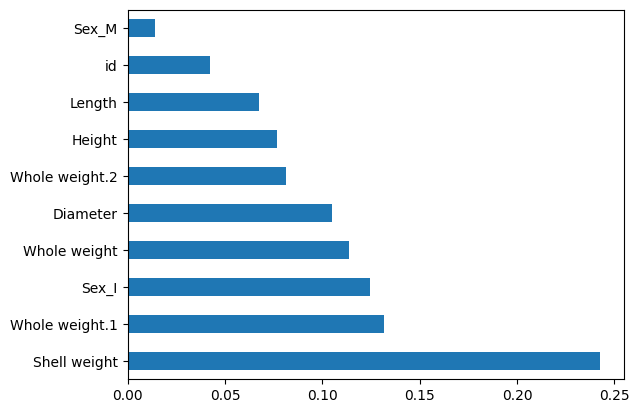

In [55]:
feat_importances = pd.Series(reg.feature_importances_, index=x_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [56]:
selected_features = ['Shell weight', 'Whole weight.1', 'Sex_I', 'Whole weight', 'Length', 'Whole weight.2', 'Diameter']

In [57]:
print(selected_features)

['Shell weight', 'Whole weight.1', 'Sex_I', 'Whole weight', 'Length', 'Whole weight.2', 'Diameter']


In [58]:
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]
x_train_selected

,Shell weight,Whole weight.1,Sex_I,Whole weight,Length,Whole weight.2,Diameter
38059,0.2265,0.3915,True,0.8915,0.580,0.1820,0.400
26114,0.1750,0.3155,False,0.7095,0.525,0.1455,0.405
19998,0.2635,0.4775,False,1.0185,0.625,0.2255,0.475
18162,0.3400,0.3675,False,1.0225,0.575,0.2155,0.450
56716,0.2350,0.2985,False,0.8270,0.570,0.2260,0.460
...,...,...,...,...,...,...,...
21243,0.0065,0.0080,True,0.0210,0.190,0.0065,0.170
45891,0.0350,0.0565,True,0.1365,0.275,0.0240,0.200
42613,0.1700,0.2645,False,0.5885,0.530,0.1415,0.415
43567,0.0850,0.1165,False,0.2665,0.405,0.0585,0.305


In [59]:
dtmodel.fit(x_train_selected,y_train)
knmodel.fit(x_train_selected,y_train)
lrmodel.fit(x_train_selected,y_train)


LinearRegression()

In [60]:
# PREDICTION
pred1=dtmodel.predict(x_test_selected)
pred2=knmodel.predict(x_test_selected)
pred3=lrmodel.predict(x_test_selected)


In [61]:
for model in models:
    pred = model['model'].predict(x_test_selected)
    print(evaluate_model(y_test, pred))

(0.302307748887515, 0.21750979288172945)
(0.5988763864364282, 0.16549669431690262)
(0.6027446135762022, 0.16716702121724705)


Results without feature selection via ExtraTreesRegressor:

(0.2985121025497409, 0.2158039329633151)
(-0.16121687329383527, 0.3110966611528479)
(0.6107223774586408, 0.1651925987148862)

results with feature selection

(0.30132210720015473, 0.21804231711009414)
(0.5988763864364282, 0.16549669431690262)
(0.6027446135762022, 0.16716702121724705)

So the kneighbors substantiall improved but the others did not change much at all

Add the actual values in so that I can plot various solutions against the actuals...

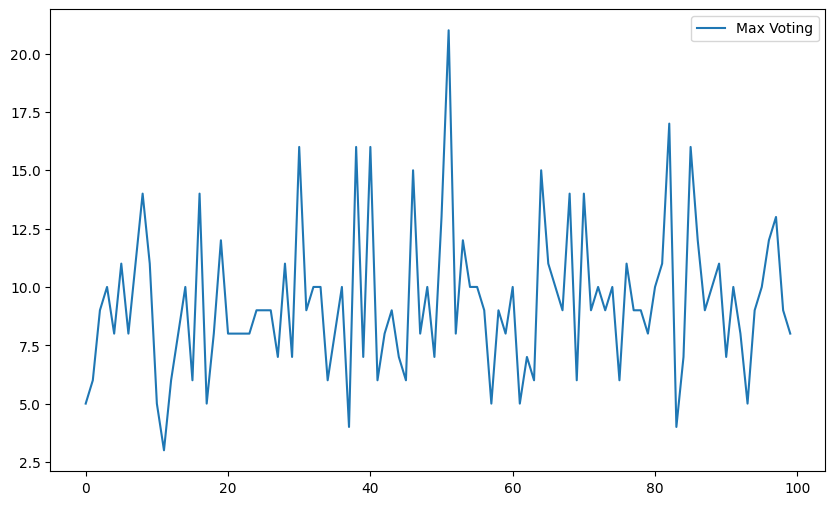

In [62]:
actual_preds = [{"predictions": y_test, "name": "Actual Values"} ]
plot_predictions(final_model1, 100)

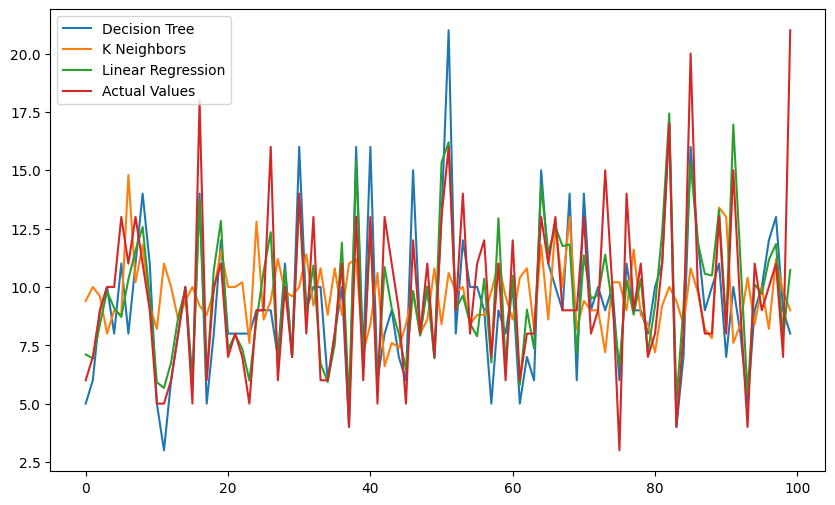

In [63]:
combo1 = models + actual_preds
plot_predictions(combo1, 100)

Too hard to pick out the individual results vs the actual.  I'll just pick the best:

## Cell Magic

See: https://ipython.readthedocs.io/en/stable/interactive/magics.html

I specifically wanted to measure the time it takes for a cell to execute, but there are other useful things here.


In [64]:
%%time

type(models[2])

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.63 µs


dict

In [65]:
print(actual_preds)

[{'predictions': 19402     6
2753      7
85629     9
7777     10
90199    10
         ..
12490    10
56089    11
74706    10
8166      8
38921     9
Name: Rings, Length: 18123, dtype: int64, 'name': 'Actual Values'}]


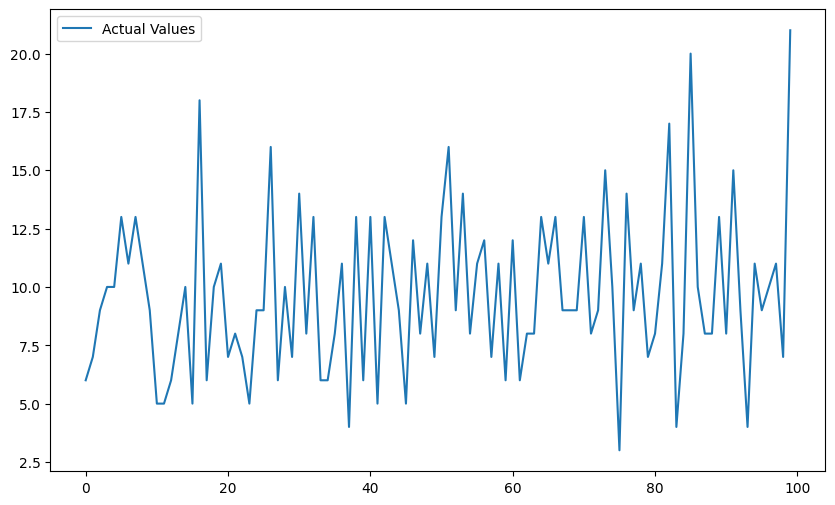

In [66]:
# huh, a rare destructive operation. After running this actual_preds has been changed...
#actual_preds.append(models[2])
#print(combo2)
plot_predictions(actual_preds, 100)

An attempt at Bagging

In [67]:
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1),n_estimators=100)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.651225273210509

Now I have to look up and see if this is a good score... :)  Note that this appears to be almost identical to the linear regression score...

I can see my Kaggle Score at: https://www.kaggle.com/competitions/playground-series-s4e4/submissions

This is almost identical to the score I already submitted: .162

But with tuning now looks a little better at 0.155!

In [68]:
pred = model.predict(x_test)
print(evaluate_model(y_test, pred))

(0.651225273210509, 0.1547209679330711)


In [69]:
from sklearn.ensemble import AdaBoostRegressor

# By default this is DecisionTreeRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=50)


regr.fit(x_train, y_train)
regr.score(x_test,y_test)

0.2589422913531736

Huh, AdaBoost does not look good.  May require more tuning to get this to work better...

In [70]:
pred = regr.predict(x_test)
print(evaluate_model(y_test, pred))

(0.2589422913531736, 0.23365300781369466)


### Tune AdaBoost
My results were underwhelming.  Let me see if I can tune it.  

<span style="color:red">Caution, this code will be slow</span>

In [71]:
param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential'] 
}

# Stop long-running Cell
without killing the whole runimportimport

hit 'i' twice!

In [72]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(regr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

KeyboardInterrupt: 

This takes so long to run, preserving the results here:

Best parameters: {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

Worrisome that the best score returned was 'nan'.  And the best params are default, except for a lower learning rate.  Not clear that this search for params actually worked properly.

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [75]:
regr2 = AdaBoostRegressor(random_state=0, learning_rate=0.01, loss='linear', n_estimators=50)


regr2.fit(x_train, y_train)
regr2.score(x_test,y_test)

0.5276142162768995

In [76]:
pred = regr2.predict(x_test)
print(evaluate_model(y_test, pred))

(0.5276142162768995, 0.17710446818036538)


After this attempt to find the best params for adaboost the results are underwhelming, though better than AdaBoost by itself.

Still it could be worth submitting this to the project, to see if it performs well on the test data.

#### Try AdaBoost with a different estimator
The default is decision tree.  Let's see if we get any different results here...

Significantly better results.  0.158 vs 0.177

In [78]:
from sklearn.tree import ExtraTreeRegressor

extra_tree = ExtraTreeRegressor(random_state=0)
regr3 = AdaBoostRegressor(estimator=extra_tree, random_state=0, learning_rate=0.01, loss='linear', n_estimators=50)


regr3.fit(x_train, y_train)
regr3.score(x_test,y_test)

0.6286841580958121

In [80]:
pred = regr3.predict(x_test)
print(evaluate_model(y_test, pred))

(0.6286841580958121, 0.15825070305797023)


## Stacking Regressor

Try to leverage the regressors I initially created

Stacking based upon:
https://www.kaggle.com/code/ronaldfischer/classifier-stacking-example/edit
and
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.StackingRegressor.html

A reminder:

dtmodel = DecisionTreeRegressor()

knmodel = KNeighborsRegressor()

lrmodel= LinearRegression()


In [73]:
# Define estimators
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor

estimator_list = [
    ('dtm',dtmodel),
    ('khm',knmodel),
    ('lrm',lrmodel) ]

# Build stack model
stack_model = StackingRegressor(
    estimators=estimator_list, final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42))

# Train stacked model
stack_model.fit(x_train, y_train)

# Make predictions
y_train_pred = stack_model.predict(x_train)
y_test_pred = stack_model.predict(x_test)

This stacked model does not have great results

In [74]:
pred = stack_model.predict(x_test)
print(evaluate_model(y_test, pred))

(0.5263579768683229, 0.1805101701815894)


# Submission Attempt

In [83]:
x_train.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_I,Sex_M
38059,38059,0.580,0.400,0.145,0.8915,0.3915,0.1820,0.2265,True,False
26114,26114,0.525,0.405,0.115,0.7095,0.3155,0.1455,0.1750,False,True
19998,19998,0.625,0.475,0.160,1.0185,0.4775,0.2255,0.2635,False,False
18162,18162,0.575,0.450,0.175,1.0225,0.3675,0.2155,0.3400,False,False
56716,56716,0.570,0.460,0.165,0.8270,0.2985,0.2260,0.2350,False,False


In [82]:
x_test.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_I,Sex_M
19402,19402,0.370,0.280,0.095,0.1975,0.0735,0.0515,0.060,True,False
2753,2753,0.410,0.300,0.080,0.3045,0.1190,0.0570,0.080,True,False
85629,85629,0.425,0.345,0.100,0.3665,0.1250,0.0800,0.117,True,False
7777,7777,0.500,0.400,0.130,0.6615,0.2690,0.1415,0.180,False,False
90199,90199,0.565,0.430,0.150,0.8380,0.4110,0.1960,0.217,False,False


In [81]:
submission.head()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_I,Sex_M
0,90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,False,True
1,90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,False,True
2,90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,False,True
3,90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,False,True
4,90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,True,False


In [84]:
submission_pred = regr3.predict(submission)

In [85]:
id_df = submission.id
pred_df = pd.DataFrame(submission_pred, columns=['Rings'])

final_df = pd.concat([id_df, pred_df], axis=1)

final_df.head()

,id,Rings
0,90615,10.0
1,90616,10.0
2,90617,9.0
3,90618,10.0
4,90619,8.0


In [86]:
final_df.to_csv('abalone-submission-03.csv', index=False)

# Notes/Todos

1. DONE: Does my Bagging example actually consider all of my models?  Seems like it only looks at one. Once I have it working properly try it with the feature-selected versions.  Bagging works with a single type of estimator...
2. DONE: I have not yet implemented HalvingGridSearchCV.  I need to figure out which parameters for which regressors make sense to search on.  Results, above took quite a while to run but produced better results.
3. DONE: Next I need to check AdaBoost and see if that has any benefit. But results were poor so maybe this needs tuning
4. DONE: Tune AdaBoost, since results were poor? Results were better but not great.  Try with a different base estimator
5. DONE: Try AdaBoost with a different base estimator.  I had better results using ExtraTree as opposed to the default.
6. DONE: Is there an ensemble that uses the various models I initially created? Yes, StackingRegressor.  My example, above uses this with the initial models I created.  Results (like that with AdaBoost) are mediocre.
7. Try some of the other ensemble methods like GBRestressor, StackingRegressor (see sklearn.ensemble)
8. DONE: This article has a couple more plots that could be useful to incorporate: https://www.nbshare.io/notebook/312837011/Decision-Tree-Regression-With-Hyper-Parameter-Tuning-In-Python/#google_vignette  They look interesting enough...
9. Submit my better estimate--good practice to figure out how to submit
10. DONE: Is it possible to time a code block? Yes, using %%time cell magic
11. DONE: Use esc i i to interrupt execution of a slow block!
12. I have not added in the feature engineering from the first submission.  This would be interesting to do!